In [1]:
import png
import os
import numpy as np
import matplotlib.pyplot as plt
import keras

/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Importing data 

In [2]:
def import_train_images():
    train_images=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/train')
    print(files)
    print(len(files)) #144
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/train/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image.reshape((420,540))              
        else:
            image=image.reshape((258,540))
        train_images.append(image)
    validation_images=train_images[0:28] #20%
    train_images=train_images[28::]
    return((train_images,validation_images)) #20%


In [3]:
def import_train_labels():
    train_labels=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/train_cleaned')
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/train_cleaned/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image.reshape((420,540))              
        else:
            image=image.reshape((258,540))
        train_labels.append(image)
    validation_labels=train_labels[0:28] #20%
    train_labels=train_labels[28::]
    return((train_labels,validation_labels))   

In [4]:
(train_images,validation_images)=import_train_images()

['194.png', '167.png', '12.png', '177.png', '14.png', '198.png', '51.png', '110.png', '164.png', '161.png', '180.png', '149.png', '59.png', '24.png', '54.png', '176.png', '213.png', '162.png', '50.png', '179.png', '138.png', '101.png', '15.png', '26.png', '57.png', '90.png', '45.png', '159.png', '117.png', '72.png', '71.png', '74.png', '125.png', '155.png', '104.png', '182.png', '207.png', '129.png', '122.png', '6.png', '141.png', '158.png', '183.png', '137.png', '78.png', '120.png', '17.png', '9.png', '95.png', '215.png', '132.png', '174.png', '195.png', '96.png', '84.png', '206.png', '200.png', '204.png', '36.png', '140.png', '68.png', '203.png', '98.png', '168.png', '21.png', '11.png', '119.png', '173.png', '80.png', '23.png', '102.png', '156.png', '33.png', '131.png', '186.png', '30.png', '20.png', '201.png', '42.png', '89.png', '188.png', '66.png', '210.png', '152.png', '147.png', '53.png', '114.png', '143.png', '165.png', '32.png', '123.png', '150.png', '75.png', '126.png', '116.

In [5]:
(train_labels,validation_labels)=import_train_labels()

In [6]:
train_images[1]

array([[239, 233, 231, ..., 169, 176, 186],
       [232, 233, 231, ..., 150, 160, 180],
       [235, 238, 236, ..., 157, 151, 154],
       ...,
       [208, 207, 210, ..., 193, 190, 196],
       [210, 214, 221, ..., 194, 199, 212],
       [219, 222, 224, ..., 191, 206, 222]], dtype=uint8)

In [7]:
len(train_images)

116

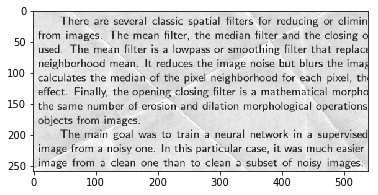

In [8]:
plt.imshow(train_images[50], cmap='gray')

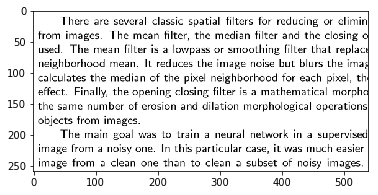

In [9]:
plt.imshow(train_labels[50], cmap='gray')

# Normalizing data

In [10]:
len(train_images[0])

420

In [11]:
def Data_split(img,lab): #split data depending on image size (540 rows or 258 rows)
    small_images=[]
    small_labels=[]
    big_images=[]
    big_labels=[]
    for i in range(len(img)):
        if len(img[i])==258:
            small_images.append(img[i])
            small_labels.append(lab[i])
        if len(img[i])==420:
            big_images.append(img[i])
            big_labels.append(lab[i])
    small_images=np.array(small_images)
    small_images=small_images.astype('float32')/255
    small_labels=np.array(small_labels)
    small_labels=small_labels.astype('float32')/255
    big_images=np.array(big_images)
    big_images=big_images.astype('float32')/255
    big_labels=np.array(big_labels)
    big_labels=big_labels.astype('float32')/255
    from keras import backend as K
    rows = 258
    cols = 540
    if K.image_data_format() == 'channels_first':
        small_images = small_images.reshape(small_images.shape[0], 1, rows, cols)
        small_labels = small_labels.reshape(small_labels.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        small_images = small_images.reshape(small_images.shape[0], rows, cols, 1)
        small_labels = small_labels.reshape(small_labels.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    rows = 420
    cols = 540
    if K.image_data_format() == 'channels_first':
        big_images = big_images.reshape(big_images.shape[0], 1, rows, cols)
        big_labels = big_labels.reshape(big_labels.shape[0], 1, rows, cols)
        input_shape = (1, rows, cols)
    else:
        big_images = big_images.reshape(big_images.shape[0], rows, cols, 1)
        big_labels = big_labels.reshape(big_labels.shape[0], rows, cols, 1)
        input_shape = (rows, cols, 1)
    return((small_images,small_labels,big_images,big_labels))

In [12]:
(small_images,small_labels,big_images,big_labels)=Data_split(train_images,train_labels)

In [13]:
(small_images_val,small_labels_val,big_images_val,big_labels_val)=Data_split(validation_images,validation_labels)

In [14]:
small_images

array([[[[0.9372549 ],
         [0.9137255 ],
         [0.90588236],
         ...,
         [0.6627451 ],
         [0.6901961 ],
         [0.7294118 ]],

        [[0.9098039 ],
         [0.9137255 ],
         [0.90588236],
         ...,
         [0.5882353 ],
         [0.627451  ],
         [0.7058824 ]],

        [[0.92156863],
         [0.93333334],
         [0.9254902 ],
         ...,
         [0.6156863 ],
         [0.5921569 ],
         [0.6039216 ]],

        ...,

        [[0.8156863 ],
         [0.8117647 ],
         [0.8235294 ],
         ...,
         [0.75686276],
         [0.74509805],
         [0.76862746]],

        [[0.8235294 ],
         [0.8392157 ],
         [0.8666667 ],
         ...,
         [0.7607843 ],
         [0.78039217],
         [0.83137256]],

        [[0.85882354],
         [0.87058824],
         [0.8784314 ],
         ...,
         [0.7490196 ],
         [0.80784315],
         [0.87058824]]],


       [[[0.9372549 ],
         [0.9137255 ],
         [0.90

In [15]:
len(small_images)

37

In [16]:
len(big_images)

79

In [17]:
len(small_images_val)

11

In [18]:
len(big_images_val)

17

In [19]:
from random import shuffle

In [20]:
def Batch_generator(s_img,b_img,s_lab,b_lab):
    while True:
        small_images_s=[]
        big_images_s=[]
        small_labels_s=[]
        big_labels_s=[]
        s=list(range(len(s_img)))
        b=list(range(len(b_img)))
        shuffle(s)
        shuffle(b)
        for i in range(len(s_img)):
            k=s[i]
            small_images_s.append(s_img[k])
            small_labels_s.append(s_lab[k])
        for i in range(len(b_img)):
            k=b[i]
            big_images_s.append(b_img[k])
            big_labels_s.append(b_lab[k])
        le=len(s_img)+len(b_img)
        if le>=72: #training data recieved
            a=8
            b=15
            c=2
            d=4
            e=35
            f=25
            g=5    #batch size
        if le<=72: #validation data recieved
            a=3
            b=4
            c=1
            d=2
            e=10
            f=16
            g=5
        for i in range(a):  
            i=i*g #batch size of 5
            if i==e:
                j=i+c
            else:
                j=i+g
            batch_image=np.array(small_images_s[i:j])
            batch_label=np.array(small_labels_s[i:j])
            yield (batch_image,batch_label)
        for i in range(b): 
            i=i*g
            if i==f:
                j=i+d
            else:
                j=i+g
            batch_image=np.array(big_images_s[i:j])
            batch_label=np.array(big_labels_s[i:j])
            yield (batch_image,batch_label)
            

# Creating Model

In [21]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
    input_shape = (1, None, 540)
else:
    input_shape = (None, 540, 1)

In [22]:
input_shape

(None, 540, 1)

In [23]:
from keras import models
from keras import layers

In [24]:
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=input_shape))
network.add(layers.MaxPooling2D((2, 2), padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.UpSampling2D((2, 2)))
network.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))


In [25]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, 540, 32)     320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, 270, 32)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, 270, 32)     9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, 270, 32)     9248      
__________

In [26]:
network2 = keras.utils.multi_gpu_model(network,gpus=2) #model for 2 GPUs

# Compiling Model

In [27]:
network.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=["accuracy"])
network2.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=["accuracy"])

# Training Model

In [28]:
earlystop=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=10)
gen=Batch_generator(small_images,big_images,small_labels,big_labels) 
val=Batch_generator(small_images_val,big_images_val,small_labels_val,big_labels_val)
history = network2.fit_generator(generator=gen,steps_per_epoch=23,epochs=200,validation_data=val,validation_steps=14,callbacks=[earlystop])

Epoch 1/200
22/23 [===========================>..] - ETA: 0s - loss: 0.4076 - acc: 0.6900

InternalError: CUB segmented reduce errorinvalid configuration argument
	 [[Node: loss_1/conv2d_8_loss/Mean_1 = Mean[T=DT_FLOAT, Tidx=DT_INT32, keep_dims=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](loss_1/conv2d_8_loss/Mean, loss_1/conv2d_8_loss/Mean_1/reduction_indices)]]

Caused by op 'loss_1/conv2d_8_loss/Mean_1', defined at:
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2909, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-91cab47d9e4a>", line 2, in <module>
    network2.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=["accuracy"])
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/keras/engine/training.py", line 830, in compile
    sample_weight, mask)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/keras/engine/training.py", line 444, in weighted
    score_array = K.mean(score_array, axis=list(range(weight_ndim, ndim)))
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 1367, in mean
    return tf.reduce_mean(x, axis, keepdims)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1411, in reduce_mean
    name=name)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2568, in _mean
    keep_dims=keep_dims, name=name)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/pedro/anaconda3/envs/EA979/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): CUB segmented reduce errorinvalid configuration argument
	 [[Node: loss_1/conv2d_8_loss/Mean_1 = Mean[T=DT_FLOAT, Tidx=DT_INT32, keep_dims=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](loss_1/conv2d_8_loss/Mean, loss_1/conv2d_8_loss/Mean_1/reduction_indices)]]


# Training avaliation

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
history.history['acc']

# Saving Model and training results

In [ ]:
import h5py               #save the network for 1 gpu
network.set_weights(network2.get_weights())
network.save('trained_network_v3_multi_size.h5')

In [ ]:
result=network2.predict(np.array([big_images_val[5]]))

In [ ]:
result

In [ ]:
result=result*255
result=result.astype('uint8')
result=result.reshape(420,540)

In [ ]:
result

In [ ]:
plt.imshow(result, cmap='gray')

# Importing Test Data

In [ ]:
def import_test_images():
    test_images=[]
    files=os.listdir('/home/pedro/Documents/AutoEncoder/test')
    print(files)
    for file in files:
        string='/home/pedro/Documents/AutoEncoder/test/'+file
        image=png.Reader(filename=string)
        w,h,pixels,metadata=image.read_flat()
        image=np.array(pixels)
        if len(image)==226800:
            image=image[0:139320]                  #cut end of big images
        image=image.reshape((258,540))
        test_images.append(image)
    return(test_images)

In [ ]:
test_images=import_test_images()

In [ ]:
test_images[1]

In [ ]:
plt.imshow(test_images[50], cmap='gray')

# Normalizing Test Data

In [ ]:
test_images=np.array(test_images)
test_images=test_images.astype('float32')/255

In [ ]:
test_images[1]

# Creating test input

In [ ]:
rows = 258
cols = 540
if K.image_data_format() == 'channels_first':
    test_images = test_images.reshape(test_images.shape[0], 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    test_images = test_images.reshape(test_images.shape[0], rows, cols, 1)
    input_shape = (rows, cols, 1)

# Running network on test data

In [ ]:
test_result=network2.predict(test_images)

In [ ]:
test_result[1]

In [ ]:
example=test_result[70]
example=example*255
example=example.astype('uint8')
example=example.reshape(258,540)

In [ ]:
plt.imshow(example, cmap='gray')

In [ ]:
pre_example=test_images[70]
pre_example=pre_example*255
pre_example=pre_example.astype('uint8')
pre_example=pre_example.reshape(258,540)

In [ ]:
plt.imshow(pre_example, cmap='gray')